# Exercises: Regression - FEATURE ENGINEERING
<a href = "https://ds.codeup.com/regression/feature-engineering/#exercises">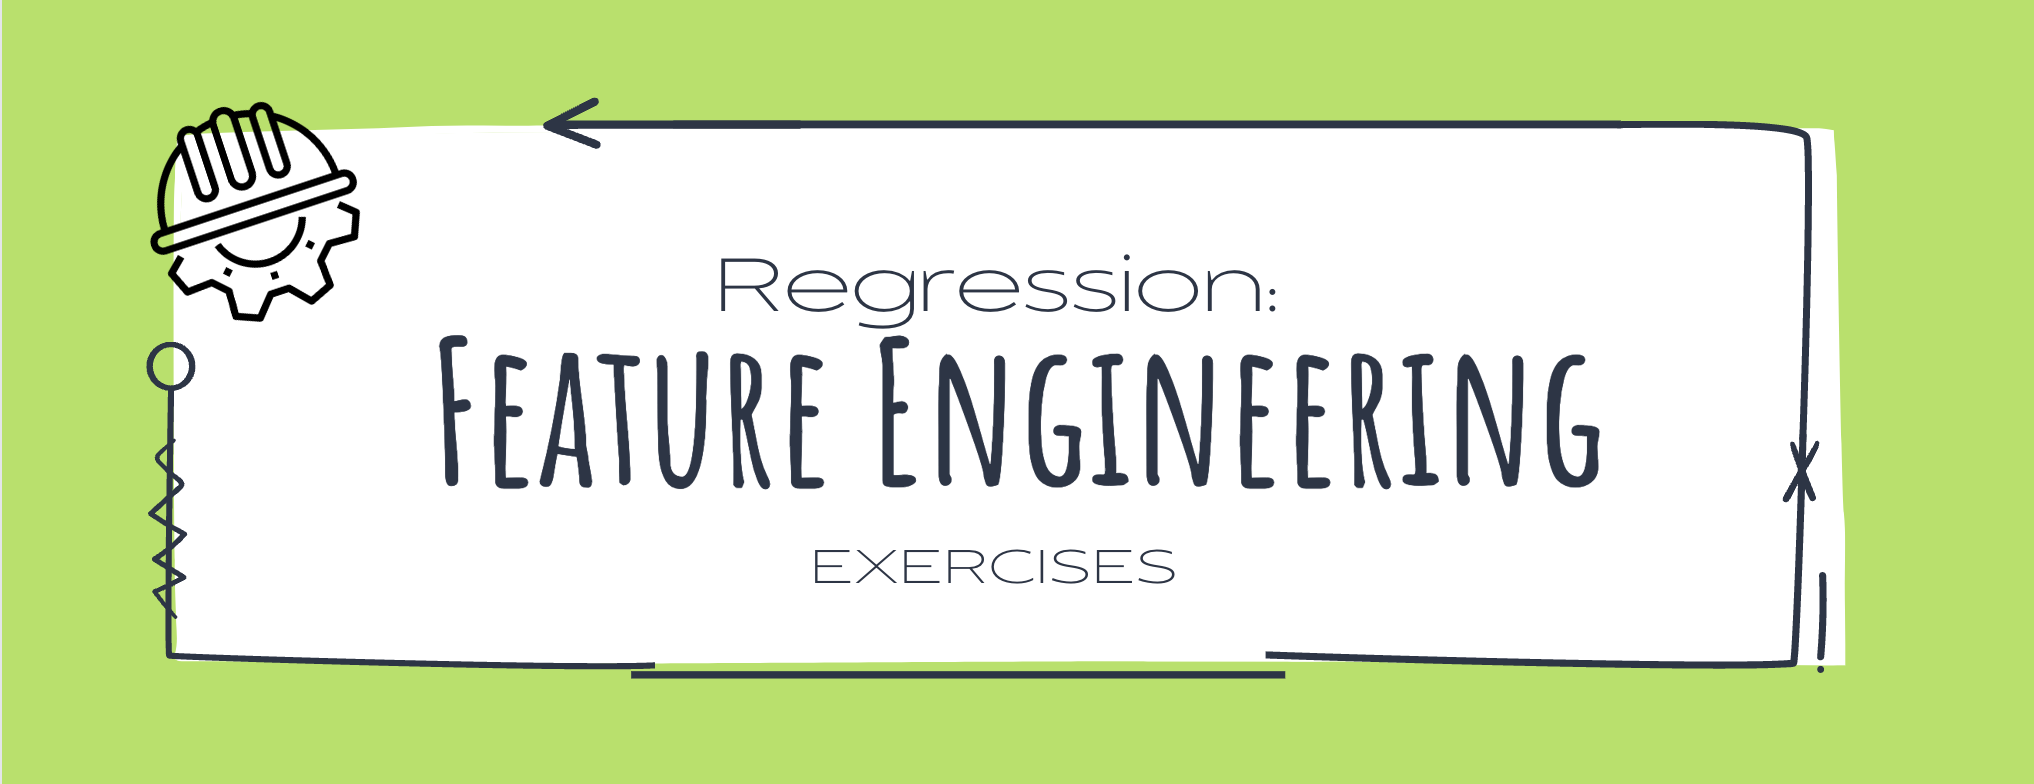</a>

<hr style="border:2px solid gray">

## Before We Begin The Exercises

<div class="alert alert-block alert-info">

#### Note:


- We should be at the point where we are creating functions that can be used over and over again.
    
    
- Something that we will consistently do is split our data into train, validate and test sets.
 
- We will also (often times) be isolating our target variables into y_train, y_validate and y_tests.

**Let's make these functions reusable!**
    
</div>

In [1]:
#create a function to split our data
def split_data(df):
    '''
    This function takes in a dataframe and splits the data,
    returning three pandas dataframes, train, test, and validate
    '''
    
    # Create train_validate and test datasets
    train_validate, test = train_test_split(df, test_size=0.2, random_state=123)
    
    # Create train and validate datsets
    train, validate = train_test_split(train_validate, test_size=0.3, random_state=123)

    # Take a look at your split datasets

    print(f"""
    train -> {train.shape}
    validate -> {validate.shape}
    test -> {test.shape}""")
    
    return train, validate, test

In [2]:
#create a function to isolate the target variable
def X_y_split(df, target):
    '''
    This function takes in a dataframe and a target variable
    Then it returns the X_train, y_train, X_validate, y_validate, X_test, y_test
    and a print statement with the shape of the new dataframes
    '''  
    train, validate, test = split_data(df)

    X_train = train.drop(columns= target)
    y_train = train[target]

    X_validate = validate.drop(columns= target)
    y_validate = validate[target]

    X_test = test.drop(columns= target)
    y_test = test[target]
        
    # Have function print datasets shape
    print(f'''
    X_train -> {X_train.shape}
    X_validate -> {X_validate.shape}
    X_test -> {X_test.shape}''') 
    
    return X_train, y_train, X_validate, y_validate, X_test, y_test

<div class="alert alert-block alert-info">

#### Note:
    
- By <u>not</u> hardcoding our dataframe and target, we can use these functions for other datasets and projects.
    
</div>

___
Do your work for this exercise in a jupyter notebook named `feature_engineering` within the `regression-exercises` repo. Add, commit, and push your work.

# 1. Load the `tips` dataset.

In [3]:
#import warnings
import warnings
warnings.filterwarnings("ignore")

#import libraries
import pandas as pd
import numpy as np

#import visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

#import dataset
from pydataset import data

#sklearn imports
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [4]:
df = data('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


In [6]:
df['size']

1      2
2      3
3      3
4      2
5      4
      ..
240    3
241    2
242    2
243    2
244    2
Name: size, Length: 244, dtype: int64

<a href = "https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.size.html">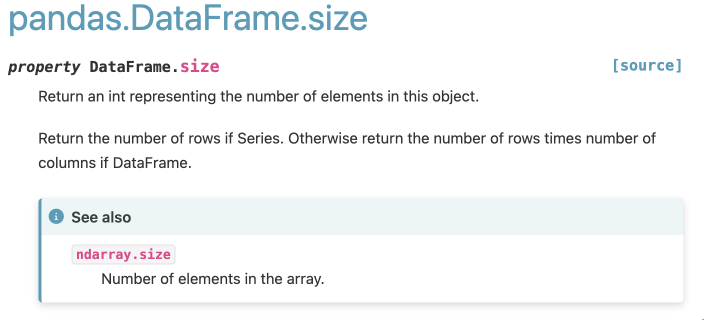</a>

In [7]:
df = df.rename(columns={'size':'number_of_people'})

In [8]:
df.number_of_people

1      2
2      3
3      3
4      2
5      4
      ..
240    3
241    2
242    2
243    2
244    2
Name: number_of_people, Length: 244, dtype: int64

<div class="alert alert-block alert-info">

#### Note:
    
We may choose to create a function that groups our data by datatype for us. 
    
This way we don't have to recreate this action each time.
    
</div>

In [9]:
def get_object_cols(df):
    '''
    This function takes in a dataframe and identifies the columns that are object types
    and returns a list of those column names. 
    '''
    # get a list of the column names that are objects (from the mask)
    object_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    return object_cols


def get_numeric_cols(df):
    '''
    This function takes in a dataframe and identifies the columns that are object types
    and returns a list of those column names. 
    '''
    # get a list of the column names that are objects (from the mask)
    num_cols = df.select_dtypes(exclude=['object', 'category']).columns.tolist()
    
    return num_cols


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_bill        244 non-null    float64
 1   tip               244 non-null    float64
 2   sex               244 non-null    object 
 3   smoker            244 non-null    object 
 4   day               244 non-null    object 
 5   time              244 non-null    object 
 6   number_of_people  244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


In [11]:
get_numeric_cols(df)

['total_bill', 'tip', 'number_of_people']

## 1.a Create a column named `price_per_person`. This should be the total bill divided by the party size.

In [12]:
df['price_per_person'] = df.total_bill / df.number_of_people

In [13]:
df.head()

,total_bill,tip,sex,smoker,day,time,number_of_people,price_per_person
1,16.99,1.01,Female,No,Sun,Dinner,2,8.495000
2,10.34,1.66,Male,No,Sun,Dinner,3,3.446667
3,21.01,3.50,Male,No,Sun,Dinner,3,7.003333
4,23.68,3.31,Male,No,Sun,Dinner,2,11.840000
5,24.59,3.61,Female,No,Sun,Dinner,4,6.147500


## 1.b Before using any of the methods discussed in the lesson, which features do you think would be most important for predicting the tip amount?

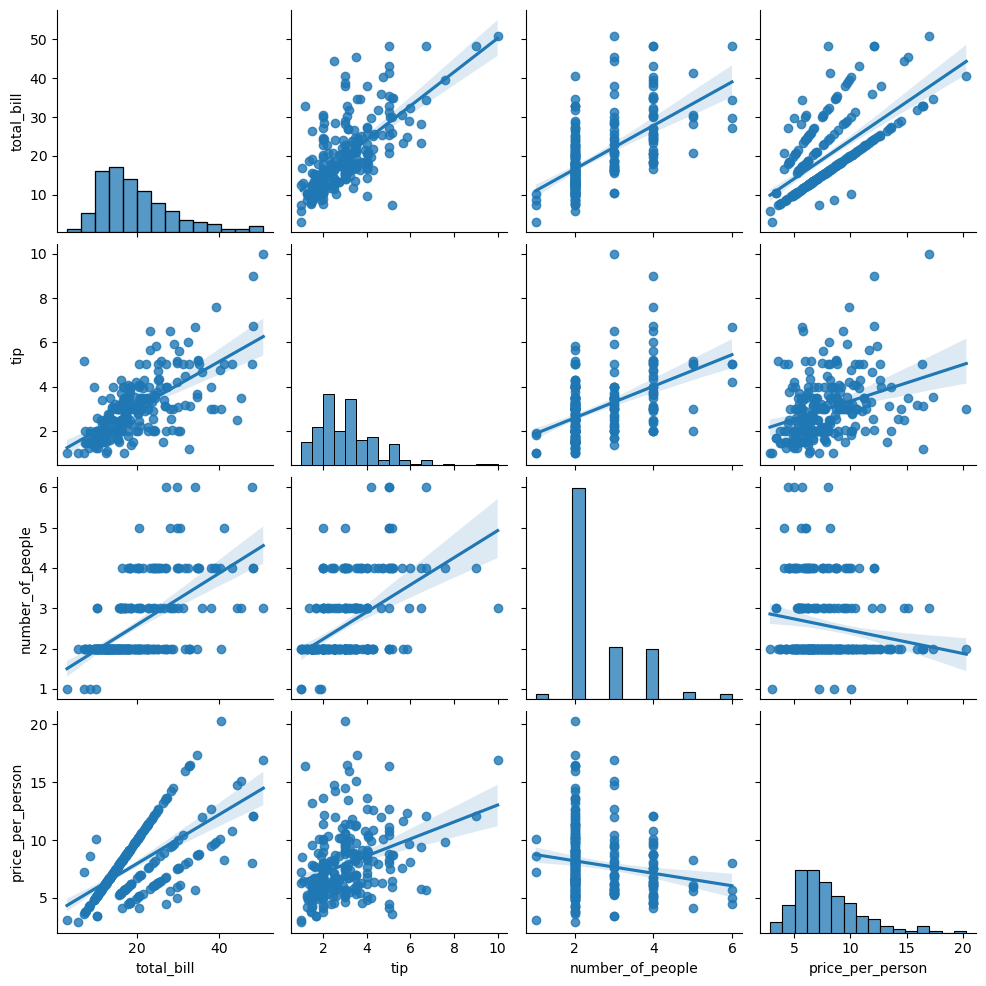

In [14]:
sns.pairplot(df, kind='reg')

`total_bill` appears to have a stronger correlation with `tips` with the smallest CI


let's confirm with .corr()

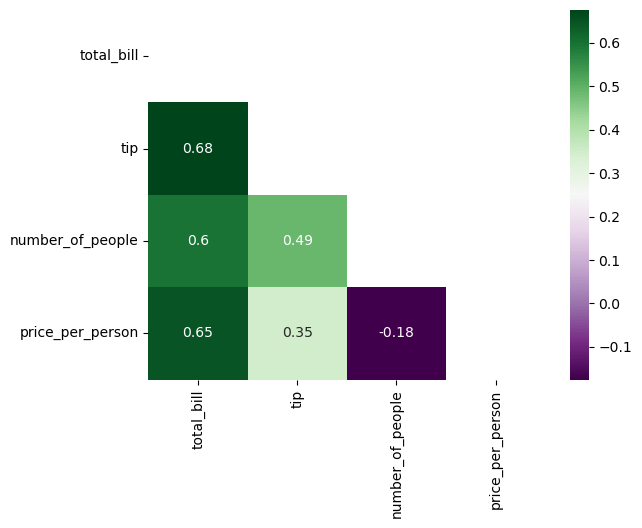

In [15]:
sns.heatmap(df.corr(), cmap='PRGn', annot=True,
           mask=np.triu(df.corr()))
plt.show()

<div class="alert alert-block alert-success">

After reviewing the correlation coefficients, I feel confident that `total_bill` would be the most important feature for predicting `tip` amount.
    
</div>

___
<div class="alert alert-block alert-info">
<b>Note:</b> 
<br>
We need to create dummy variables for two reasons:

<br>
    
- In order to use RFE, we cannot have 'object' datatypes
<br>
- We will also need dummy variables in order to scale. The scaler does not know what objects are; It doesn't understand what "Female" or "Saturday" mean.

</div>

In [16]:
obj_cols = get_object_cols(df)

In [17]:
#Create dummy cols for cat feats

df_dummy=pd.get_dummies(columns=obj_cols, data=df)

In [18]:
df_dummy.head()

,total_bill,tip,number_of_people,price_per_person,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
1,16.99,1.01,2,8.495000,1,0,1,0,0,0,1,0,1,0
2,10.34,1.66,3,3.446667,0,1,1,0,0,0,1,0,1,0
3,21.01,3.50,3,7.003333,0,1,1,0,0,0,1,0,1,0
4,23.68,3.31,2,11.840000,0,1,1,0,0,0,1,0,1,0
5,24.59,3.61,4,6.147500,1,0,1,0,0,0,1,0,1,0


In [19]:
#drop a couple cols that are redundant

df_dummy.drop(columns = ['sex_Female', 'smoker_No', 'time_Dinner', 'day_Thur'], inplace=True)
df_dummy.head()

,total_bill,tip,number_of_people,price_per_person,sex_Male,smoker_Yes,day_Fri,day_Sat,day_Sun,time_Lunch
1,16.99,1.01,2,8.495000,0,0,0,0,1,0
2,10.34,1.66,3,3.446667,1,0,0,0,1,0
3,21.01,3.50,3,7.003333,1,0,0,0,1,0
4,23.68,3.31,2,11.840000,1,0,0,0,1,0
5,24.59,3.61,4,6.147500,0,0,0,0,1,0


In [20]:
# split that data!

train, validate, test = split_data(df_dummy)


    train -> (136, 10)
    validate -> (59, 10)
    test -> (49, 10)


In [21]:
X_train, y_train, X_validate, y_validate, X_test, y_test = X_y_split(df_dummy, 'tip')


    train -> (136, 10)
    validate -> (59, 10)
    test -> (49, 10)

    X_train -> (136, 9)
    X_validate -> (59, 9)
    X_test -> (49, 9)


In [22]:
def scale_data(train, 
               validate, 
               test, 
               to_scale):
    #make copies for scaling
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()

    #scale them!
    #make the thing
    scaler = MinMaxScaler()

    #fit the thing
    scaler.fit(train[to_scale])

    #use the thing
    train_scaled[to_scale] = scaler.transform(train[to_scale])
    validate_scaled[to_scale] = scaler.transform(validate[to_scale])
    test_scaled[to_scale] = scaler.transform(test[to_scale])
    
    return train_scaled, validate_scaled, test_scaled

In [23]:
X_train.columns.tolist()

['total_bill',
 'number_of_people',
 'price_per_person',
 'sex_Male',
 'smoker_Yes',
 'day_Fri',
 'day_Sat',
 'day_Sun',
 'time_Lunch']

In [24]:
to_scale = X_train.columns.tolist()

In [25]:
X_train_scaled, X_validate_scaled, X_test_scaled = scale_data(X_train, X_validate, X_test, to_scale)

In [26]:
X_train_scaled.columns

Index(['total_bill', 'number_of_people', 'price_per_person', 'sex_Male',
       'smoker_Yes', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch'],
      dtype='object')

In [27]:
print(f"""
X_train_scaled: {X_train_scaled.shape} 
X_validate_scaled: {X_validate_scaled.shape} 
X_test_scaled: {X_test_scaled.shape}
""")


X_train_scaled: (136, 9) 
X_validate_scaled: (59, 9) 
X_test_scaled: (49, 9)



In [28]:
X_train_scaled.head()

,total_bill,number_of_people,price_per_person,sex_Male,smoker_Yes,day_Fri,day_Sat,day_Sun,time_Lunch
19,0.307114,0.4,0.150344,0.0,0.0,0.0,0.0,1.0,0.0
173,0.092355,0.2,0.032258,1.0,1.0,0.0,0.0,1.0,0.0
119,0.206805,0.2,0.182796,0.0,0.0,0.0,0.0,0.0,1.0
29,0.411622,0.2,0.452194,1.0,0.0,0.0,1.0,0.0,0.0
238,0.657534,0.2,0.775647,1.0,1.0,0.0,1.0,0.0,0.0


## 1.c Use select k best to select the top 2 features for predicting tip amount. What are they?

In [29]:
#MAKE the thing
kbest = SelectKBest(f_regression, k=2)

#FIT the thing
kbest.fit(X_train_scaled, y_train)

SelectKBest(k=2, score_func=<function f_regression at 0x289051c60>)

In [30]:
#Turn the f scores into a df to view

kbest_results = pd.DataFrame(dict(p_value=kbest.pvalues_, f_score=kbest.scores_), 
                index=X_train_scaled.columns)

In [31]:
kbest_results.sort_values(by=['f_score'], ascending=False)

,p_value,f_score
total_bill,7.186470e-20,115.984909
number_of_people,1.341642e-12,61.259089
price_per_person,1.310327e-03,10.777792
day_Sun,1.236625e-01,2.400404
time_Lunch,1.821449e-01,1.798647
sex_Male,2.844794e-01,1.154792
day_Fri,4.068238e-01,0.692418
smoker_Yes,5.579978e-01,0.344909
day_Sat,9.550468e-01,0.003190


In [32]:
kbest_results.sort_values(by=['f_score'], ascending=False).head(2)

,p_value,f_score
total_bill,7.186470e-20,115.984909
number_of_people,1.341642e-12,61.259089


In [33]:
#create the mask
feature_mask = kbest.get_support()

#now we are going to ask for the column names of select k best top 2 features
X_train_scaled.columns[feature_mask]

Index(['total_bill', 'number_of_people'], dtype='object')

## 1.d Use recursive feature elimination to select the top 2 features for tip amount. What are they?

In [34]:
#Choose learning estimator
model = LinearRegression()

# MAKE the thing
rfe = RFE(model, n_features_to_select=2)

# FIT the thing
rfe.fit(X_train_scaled, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=2)

Identify top 2 features by viewing all in a dataframe

*Remember `1` rank denotes features to be included.

In [35]:
rfe_ranking = pd.DataFrame({'rfe_ranking': rfe.ranking_},
                              index=X_train_scaled.columns)

In [36]:
rfe_ranking.sort_values(by=['rfe_ranking'], ascending=True)

,rfe_ranking
total_bill,1
price_per_person,1
number_of_people,2
sex_Male,3
day_Fri,4
day_Sun,5
smoker_Yes,6
day_Sat,7
time_Lunch,8


Or use `.get_support()` to list the k # of top features

In [37]:
#create a variable that takes X_train and turns rfe features into a list
rfe_columns = X_train_scaled.columns[rfe.support_].tolist()

#call the variable
rfe_columns

['total_bill', 'price_per_person']

## 1.e Why do you think `SelectKBest` and recursive feature elimination might give different answers for the top features? 

Does this change as you change the number of features you are selecting?

In [38]:
X_train_scaled.columns[SelectKBest(score_func=f_regression, k=2).fit(X_train_scaled, y_train).get_support()]


Index(['total_bill', 'number_of_people'], dtype='object')

In [39]:
X_train_scaled.columns[SelectKBest(score_func=f_regression, k=5).fit(X_train_scaled, y_train).get_support()]


Index(['total_bill', 'number_of_people', 'price_per_person', 'day_Sun',
       'time_Lunch'],
      dtype='object')

In [40]:
X_train_scaled.columns[RFE(LinearRegression(), n_features_to_select=2).fit(X_train_scaled, y_train).get_support()]

Index(['total_bill', 'price_per_person'], dtype='object')

In [41]:
X_train_scaled.columns[RFE(LinearRegression(), n_features_to_select=5).fit(X_train_scaled, y_train).get_support()]

Index(['total_bill', 'number_of_people', 'price_per_person', 'sex_Male',
       'day_Fri'],
      dtype='object')

# 2. Write a function named `select_kbest` that takes in the predictors (X), the target (y), and the number of features to select (k) and returns the names of the top k selected features based on the `SelectKBest` class. Test your function with the `tips` dataset. You should see the same results as when you did the process manually.

In [42]:
#now let's put together everything we learned above and make a function to do all of those steps together
def select_kbest(X, y, k=2):
    '''
    will take in two pandas objects:
    X: a dataframe representing numerical independent features
    y: a pandas Series representing a target variable
    k: a keyword argument defaulted to 2 for the number of ideal features we elect to select
    
    return: a list of the selected features from the SelectKBest process
    '''
    kbest = SelectKBest(f_regression, k=k)
    kbest.fit(X, y)
    mask = kbest.get_support()
    return X.columns[mask]

In [43]:
select_kbest(X_train_scaled, y_train, 2)

Index(['total_bill', 'number_of_people'], dtype='object')

In [44]:
select_kbest(X_train_scaled, y_train,5)

Index(['total_bill', 'number_of_people', 'price_per_person', 'day_Sun',
       'time_Lunch'],
      dtype='object')

# 3. Write a function named `rfe` that takes in the predictors, the target, and the number of features to select. It should return the top k features based on the RFE class. Test your function with the tips dataset. You should see the same results as when you did the process manually.



In [45]:
def show_features_rankings(X_train, rfe):
    """
    Takes in a dataframe and a fit RFE object in order to output the rank of all features
    """
    # Dataframe of rankings
    ranks = pd.DataFrame({'rfe_ranking': rfe.ranking_}
                        ,index = X_train.columns)
    
    ranks = ranks.sort_values(by="rfe_ranking", ascending=True)
    
    return ranks

In [46]:
#now let's put together everything we learned above and make a function to do all of those steps together
def rfe(X, y, k=2):
    '''
    will take in two pandas objects:
    X: a dataframe representing numerical independent features
    y: a pandas Series representing a target variable
    k: a keyword argument defaulted to 2 for the number of ideal features we elect to select
    
    return: a list of the selected features from the recursive feature elimination process
        & a df of all rankings
    '''
    #MAKE the thing
    rfe = RFE(LinearRegression(), n_features_to_select=k)
    #FIT the thing
    rfe.fit(X, y)
        
    # use the thing
    features_to_use = X.columns[rfe.support_].tolist()
    
    # we need to send show_feature_rankings a trained/fit RFE object
    all_rankings = show_features_rankings(X, rfe)
    
    return features_to_use, all_rankings


In [47]:
#let's call our function using x and y train with the 2 top features
selected_features, all_rankings = rfe(X_train_scaled, y_train, 2)

print(selected_features)
all_rankings

['total_bill', 'price_per_person']


,rfe_ranking
total_bill,1
price_per_person,1
number_of_people,2
sex_Male,3
day_Fri,4
day_Sun,5
smoker_Yes,6
day_Sat,7
time_Lunch,8


In [48]:
#let's call our function using x and y train with the 2 top features
selected_features, all_rankings = rfe(X_train_scaled, y_train, 5)

print(selected_features)
all_rankings

['total_bill', 'number_of_people', 'price_per_person', 'sex_Male', 'day_Fri']


,rfe_ranking
total_bill,1
number_of_people,1
price_per_person,1
sex_Male,1
day_Fri,1
day_Sun,2
smoker_Yes,3
day_Sat,4
time_Lunch,5


In [49]:
X_train_scaled.head()

,total_bill,number_of_people,price_per_person,sex_Male,smoker_Yes,day_Fri,day_Sat,day_Sun,time_Lunch
19,0.307114,0.4,0.150344,0.0,0.0,0.0,0.0,1.0,0.0
173,0.092355,0.2,0.032258,1.0,1.0,0.0,0.0,1.0,0.0
119,0.206805,0.2,0.182796,0.0,0.0,0.0,0.0,0.0,1.0
29,0.411622,0.2,0.452194,1.0,0.0,0.0,1.0,0.0,0.0
238,0.657534,0.2,0.775647,1.0,1.0,0.0,1.0,0.0,0.0


# 4. Load the `swiss` dataset and use all the other features to predict `Fertility`. Find the top 3 features using both select k best and recursive feature elimination (*use the functions you just built to help you out*).

In [50]:
#load swiss data
swiss= data('swiss')

In [51]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [52]:
swiss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


In [53]:
# X and y splits
target = "Fertility"

# Split the data
train, validate, test = split_data(swiss)

# Setup X and y
X_train = train.drop(columns=[target])
y_train = train[target]

X_validate = validate.drop(columns=[target])
y_validate = validate[target]

X_test = test.drop(columns=[target])
y_test = test[target]


    train -> (25, 6)
    validate -> (12, 6)
    test -> (10, 6)


In [54]:
to_scale = X_train.columns.tolist()

In [55]:
X_train_scaled, X_validate_scaled, X_test_scaled = scale_data(X_train, X_validate, X_test, to_scale)

In [56]:
print(f"""
X_train_scaled: {X_train_scaled.shape} 
X_validate_scaled: {X_validate_scaled.shape} 
X_test_scaled: {X_test_scaled.shape}
""")


X_train_scaled: (25, 5) 
X_validate_scaled: (12, 5) 
X_test_scaled: (10, 5)



In [57]:
select_kbest(X_train_scaled, y_train, 3).tolist()

['Examination', 'Catholic', 'Infant.Mortality']

In [58]:
# Find the top 3 features using RFE
selected_features, all_rankings = rfe(X_train_scaled, y_train, 3)

print(selected_features)
all_rankings

['Agriculture', 'Examination', 'Infant.Mortality']


,rfe_ranking
Agriculture,1
Examination,1
Infant.Mortality,1
Catholic,2
Education,3
